In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

In [2]:
from brownian_datagen import BrownianDatagen
from datasets import reverse_windows_targets

In [3]:
def transform_windows_targets(windows: NDArray, targets: NDArray) -> NDArray:
    assert 2 == windows.ndim == targets.ndim
    assert windows.shape[0] == targets.shape[0]

    d = np.zeros(windows.shape)
    d[:, :-1] = windows[:, 1:] - windows[:, :1]
    d[:, -1:] = targets - windows[:, :1]
    return d

In [4]:
b = BrownianDatagen(kBT=1., γ=1., k=1., λ_τ=5., τ=10.)
numParticles = 100
rng_seed = 42

windows, targets = b.windows_targets(window_len=2, rng_seed=rng_seed, numParticles=numParticles)
print(windows.shape, targets.shape)

d_f = transform_windows_targets(windows, targets)
print(d_f.shape)

d_b = transform_windows_targets(*b.windows_targets(backward=True, window_len=2, rng_seed=rng_seed, numParticles=numParticles))
print(d_b.shape)

(9800, 2) (9800, 1)
(9800, 2)
(9800, 2)


Text(0.5, 0.98, 'rng_seed=42, numParticles=100, for training I use numParticles~=30')

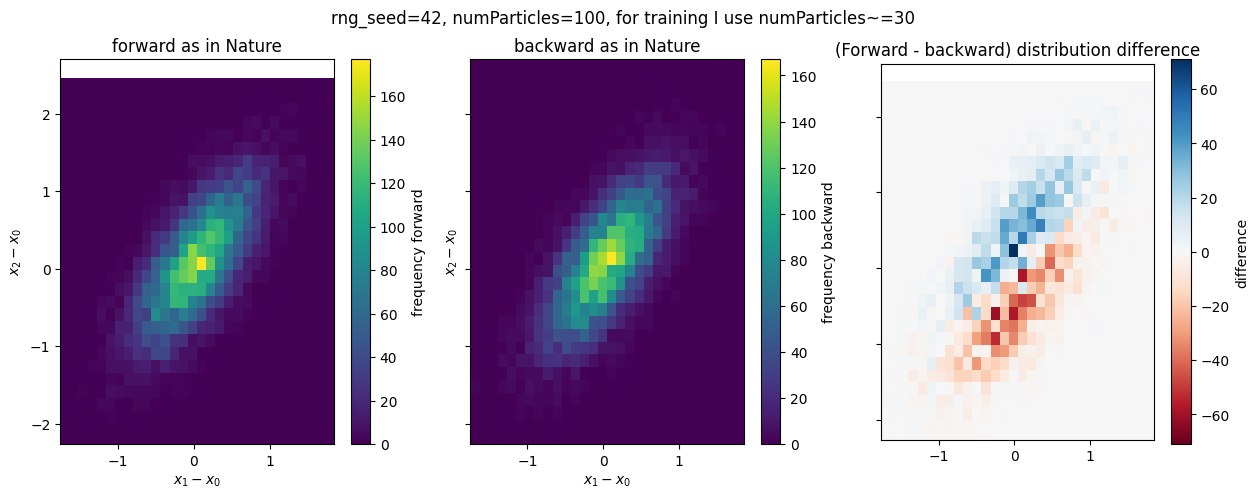

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
hist1 = ax1.hist2d(d_f[:, 0], d_f[:, 1], bins=30, cmap='viridis')
cbar1 = plt.colorbar(hist1[3], ax=ax1, label="frequency forward")

ax1.set_title("forward as in Nature")
ax1.set_ylabel(r"$x_2-x_0$")
ax1.set_xlabel(r"$x_1-x_0$")

hist2 = ax2.hist2d(d_b[:, 0], d_b[:, 1], bins=30, cmap='viridis')
plt.colorbar(hist2[3], ax=ax2, label="frequency backward")
ax2.set_title("backward as in Nature")
ax2.set_ylabel(r"$x_2-x_0$")
ax2.set_xlabel(r"$x_1-x_0$")

diff_hist = hist1[0] - hist2[0]
im = ax3.imshow(diff_hist.T, extent=[hist1[1][0], hist1[1][-1], hist1[2][0], hist1[2][-1]],
                origin='lower', cmap='RdBu', vmin=-np.abs(diff_hist).max(), vmax=np.abs(diff_hist).max())
cbar3 = plt.colorbar(im, ax=ax3, label='difference')
ax3.set_title('(Forward - backward) distribution difference')

plt.suptitle(f"rng_seed={rng_seed}, numParticles={numParticles}, for training I use numParticles~=30")